## KNN Classifier

In [1]:
# Python 2, 3 version 호환
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv("./Iris.csv")

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
type(data)

pandas.core.frame.DataFrame

In [6]:
print("- Data has {} rows and {} columns.".format(*data.shape))

- Data has 150 rows and 5 columns.


In [7]:
print("- Column names: ", list(data.columns))

- Column names:  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc36828>,
      dtype=object)

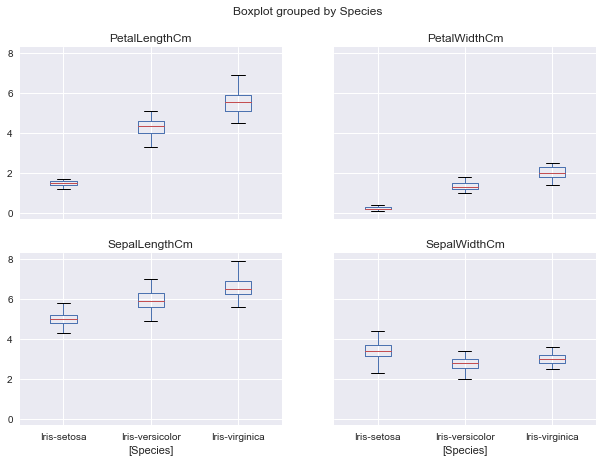

In [8]:
data.boxplot(by='Species', figsize=(10, 7))

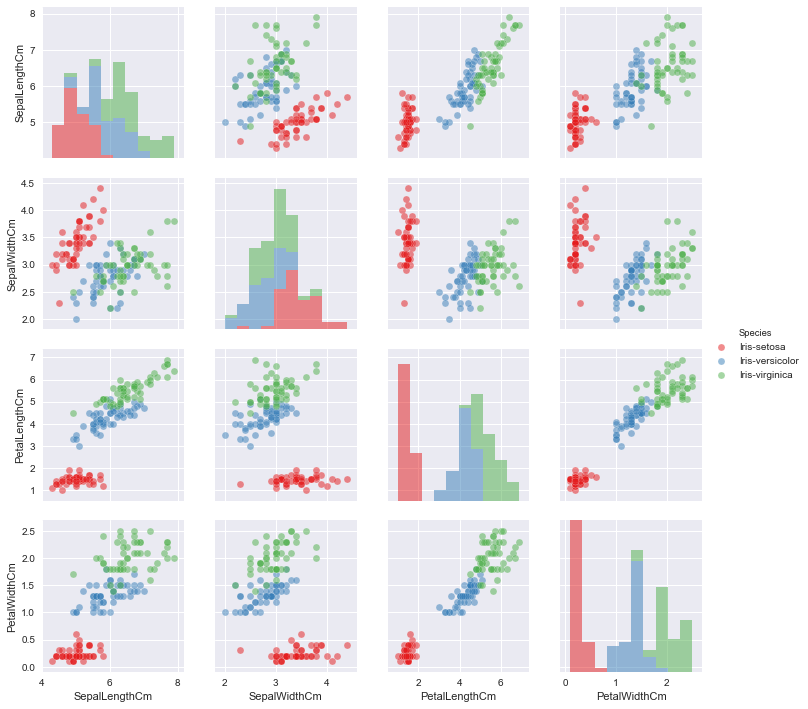

In [9]:
sns.pairplot(data=data, hue='Species', palette='Set1',
             diag_kws={'alpha': 0.5},
             plot_kws={'alpha': 0.5})

In [23]:
X = data.drop(['Species'], axis=1)

In [24]:
y = data['Species']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Split dataset train(90%), test(10%), 
# stratify = y label 별로 데이터셋을 split
# random_state = seed for random number generator
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    stratify=y, random_state=19810521)

In [64]:
type(X_train)

numpy.ndarray

In [112]:
X_train[0:3]

array([[ 1.04331836,  0.09395054,  1.04868502,  1.58519528],
       [-1.2837352 ,  0.78576819, -1.23566315, -1.31562418],
       [-0.05897017, -1.05907886,  0.13494575,  0.00293012]])

In [114]:
X_train[0:3,2:4]

array([[ 1.04868502,  1.58519528],
       [-1.23566315, -1.31562418],
       [ 0.13494575,  0.00293012]])

In [118]:
dk = pd.DataFrame(data = X_train[0:3,2:4],
                  columns=["col1", "col2"])

In [119]:
dk.head()

,col1,col2
0,1.048685,1.585195
1,-1.235663,-1.315624
2,0.134946,0.002930


In [27]:
from sklearn.preprocessing import StandardScaler

In [60]:
# Standardize dataset columnwise, to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [66]:
# Instantiate a K-Nearest Neighbor classifier with arbitrary neighbor size 'k'
clf_knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

In [68]:
# Fit on training set (trainging dataset으로 KNN model 생성)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [71]:
# KNN 생성 변수 보기
clf_knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [75]:
# Predict labels of train & validation sets
y_train_pred = clf_knn.predict(X_train)
y_test_pred = clf_knn.predict(X_test)

In [95]:
type(y_train_pred)

numpy.ndarray

In [122]:
y_train_pred[:2]

array(['Iris-virginica', 'Iris-setosa'], dtype=object)

In [123]:
y_train[:2]

140    Iris-virginica
11        Iris-setosa
Name: Species, dtype: object

In [125]:
type(y_train)

pandas.core.series.Series

In [130]:
clf_knn.predict_proba(X_train)[:3]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [131]:
clf_knn.score(X_train,y_train)

0.9481481481481482

In [80]:
from sklearn.metrics import accuracy_score

In [84]:
# Show train & validation accuracies
print('- Accuracy (Train)       : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Test)        : {:.4}'.format(accuracy_score(y_test, y_test_pred)))

- Accuracy (Train)       : 0.9481
- Accuracy (Test)        : 0.9333
